# Data Preprocessing 

### About dataset
For the Given Dataset it has one dependent variable and 7 independent variable.With this data set you can clean the dataset in many ways and build models accordingly to predict the price !.

<b>Columns:</b>
* Price - Target Variable.
* Year - Year of the car purchased.
* Mileage - The no.of kms drove by the car.
* City - In which city it was sold.
* State - In which state it was sold.
* Vin - a unique number for a car.
* Make - Manufacturer of the car.
* Model - The model(name) of the car.

In [89]:
#standard imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer

In [90]:
#reading the data
data=pd.read_csv(r"C:\Users\asus\Documents\Projects\Car Price Prediction System\Dataset\true_car_listings.csv")

In [91]:
data.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


Above we see there aren't any missing values in any of the columns

In [93]:
data.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [94]:
X,Y=data.drop("Price",axis=1),data['Price']

In [95]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [96]:
#So let's first create a average model which will just throw a average of all the prices for each query point as price to get a baseline score
avg=np.average(Y_train) 

In [97]:
y_pred=[avg for i in range(len(X_train))]

In [98]:
mean_absolute_percentage_error(Y_train,y_pred)

0.6035729300097061

In [99]:
y_pred_test=[avg for i in range(len(X_test))]
mean_absolute_percentage_error(Y_test,y_pred_test)

0.6005967980169913

#### So we see that the average base model is performing significantly bad with a MAPE score of 60% but this will be our baseline score from where we have to start improving

In [100]:
data[['Price','Mileage','Year']].corr()

,Price,Mileage,Year
Price,1.000000,-0.421237,0.401250
Mileage,-0.421237,1.000000,-0.764849
Year,0.401250,-0.764849,1.000000


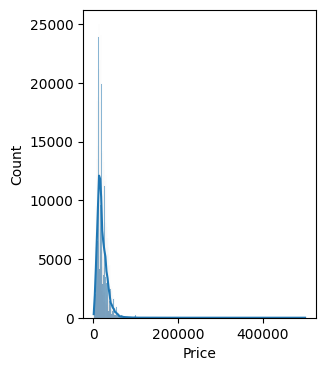

In [101]:
plt.figure(figsize=(3,4))
sns.histplot(data['Price'],kde=True)
plt.show()

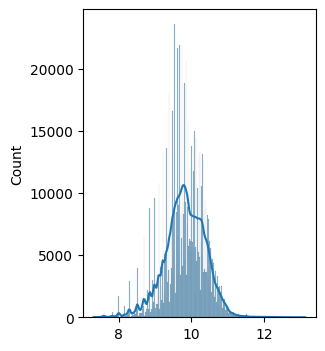

In [102]:
log_price=[np.log(i) for i in data['Price']]
plt.figure(figsize=(3,4))
sns.histplot(log_price,kde=True)
plt.show()

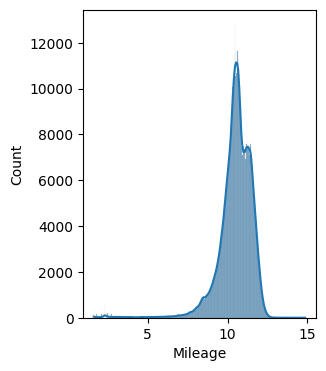

In [103]:
plt.figure(figsize=(3,4))
sns.histplot(np.log(data['Mileage']),kde=True)
plt.show()

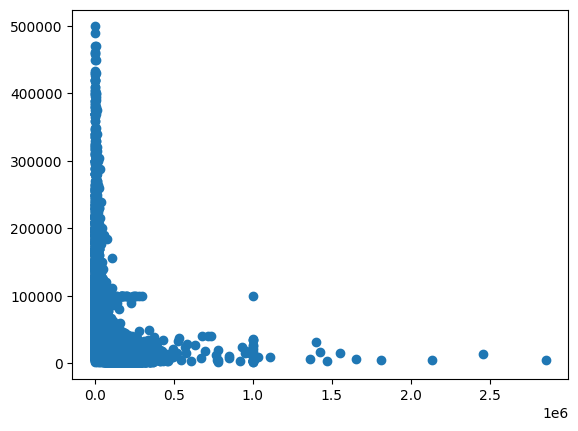

In [104]:
plt.scatter(data['Mileage'],data['Price'])

In [118]:
categorical_col=['Year','City','State','Make','Model','Vin']

one_hot_transformer=ColumnTransformer(
    transformers=[('onehot',OneHotEncoder(handle_unknown='ignore'),categorical_col)],
    remainder='passthrough'
)
pipe=Pipeline([
    ('onehot',one_hot_transformer),
    ('model',LinearRegression())
]
)

In [120]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('onehot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Year', 'City', 'State',
                                                   'Make', 'Model', 'Vin'])])),
                ('model', LinearRegression())])

In [121]:
y_pred_train=pipe.predict(X_train)
mean_absolute_percentage_error(Y_train,y_pred_train)

0.3247442947258474

In [122]:
y_pred_test=pipe.predict(X_test)
mean_absolute_percentage_error(Y_test,y_pred_test)

0.3247074420241882

#### This is cool, we brought down the MAPE to half of its initial value but we still need to do better.

* Also one good point to note is that both test and train MAPE scores are equal which means we have no issues of overfitting